<a href="https://colab.research.google.com/github/yadavpa1/CS760-Machine-Learning/blob/main/CS760_HW4_Q4_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [72]:
cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import numpy as np
import time
from sklearn.datasets import fetch_openml
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from scipy.special import expit, softmax

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = (X/255) #.astype('float32')
y = to_categorical(y)

In [ ]:
m = 60000
m_test = X.shape[0] - m

y = y.astype(int)
X_train, X_test = X[:m].T, X[m:].T
y_train, y_test = y[:m].T, y[m:].T

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
import keras
keras.__version__

'2.14.0'

In [1]:
# PyTorch Implementation
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Creating network & loading dataset
input_size  = 784  # 28 x 28
hidden_size = 300
num_classes = 10
num_epochs  = 60
batch_size  = 64
learning_rate = 0.01

In [3]:
# Import MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,  transform=transforms.ToTensor(), download=True)
test_dataset  = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

# Importing the Dataloader & specify Batch size
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 231626013.23it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 16864220.22it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 72270898.87it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 17989167.86it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



torch.Size([64, 1, 28, 28])


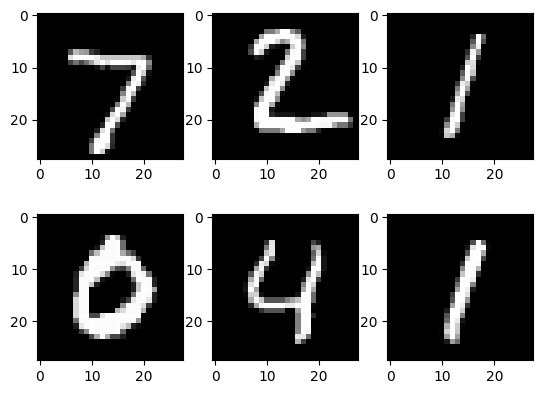

In [4]:
examples = iter(test_loader)
example_data, example_targets = next(examples)
print(example_data.shape)
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [9]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.input_size = input_size
    self.l1 = nn.Linear(input_size, hidden_size)
    self.sigmoid = nn.Sigmoid()
    self.l2 = nn.Linear(hidden_size, num_classes)
    #self.softmax = nn.Softmax(dim=1) # cross-entropy loss calculates it

  def forward(self, x):
    x = self.l1(x)
    x = self.sigmoid(x)
    x = self.l2(x)
    #x = self.softmax(x)
    return x

In [11]:
model = NeuralNet(input_size, hidden_size, num_classes)
print(model)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0)

train_losses = []
test_losses = []
test_accuracies = []

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  model.train()
  running_loss = 0.0
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28)
    outputs = model(images)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    if (i+1) % 100 == 0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

  train_loss = running_loss / len(train_loader)
  train_losses.append(train_loss)

  model.eval()
  with torch.no_grad():
    n_correct = 0
    n_samples = 0
    test_loss = 0.0
    for images, labels in test_loader:
      images = images.reshape(-1, 28*28)
      outputs = model(images)
      loss = criterion(outputs, labels)
      test_loss += loss.item()
      _, predicted = torch.max(outputs.data, 1) # max returns (value ,index)
      n_samples += labels.size(0)
      n_correct += (predicted == labels).sum().item()


    test_loss = test_loss / len(test_loader)
    test_losses.append(test_loss)

    test_accuracy = (100.0 * n_correct) / n_samples
    test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%, Test Error: {100-test_accuracy:.2f}%')

NeuralNet(
  (l1): Linear(in_features=784, out_features=300, bias=True)
  (sigmoid): Sigmoid()
  (l2): Linear(in_features=300, out_features=10, bias=True)
)
Epoch [1/60], Step[100/938], Loss: 2.2552
Epoch [1/60], Step[200/938], Loss: 2.2447
Epoch [1/60], Step[300/938], Loss: 2.2087
Epoch [1/60], Step[400/938], Loss: 2.1553
Epoch [1/60], Step[500/938], Loss: 2.1141
Epoch [1/60], Step[600/938], Loss: 2.0689
Epoch [1/60], Step[700/938], Loss: 2.0242
Epoch [1/60], Step[800/938], Loss: 1.9752
Epoch [1/60], Step[900/938], Loss: 1.8730
Epoch [1/60], Train Loss: 2.1252, Test Loss: 1.8697, Test Accuracy: 66.23%, Test Error: 33.77%
Epoch [2/60], Step[100/938], Loss: 1.7976
Epoch [2/60], Step[200/938], Loss: 1.7790
Epoch [2/60], Step[300/938], Loss: 1.7411
Epoch [2/60], Step[400/938], Loss: 1.6110
Epoch [2/60], Step[500/938], Loss: 1.5133
Epoch [2/60], Step[600/938], Loss: 1.4577
Epoch [2/60], Step[700/938], Loss: 1.2320
Epoch [2/60], Step[800/938], Loss: 1.2347
Epoch [2/60], Step[900/938], Loss:

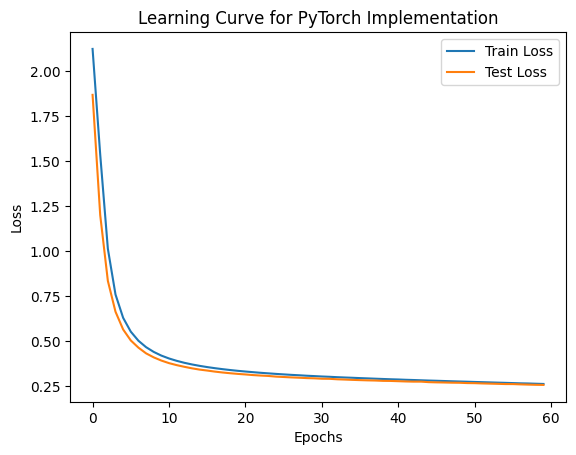

In [23]:
# Plot the train and test loss curve
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve for PyTorch Implementation')
plt.legend()
plt.savefig('q4_pytorch0.png')
plt.show()

In [38]:
# initialize weights to 0
def init_weights_zero(m):
  if type(m) == nn.Linear:
    m.weight.data.fill_(0.0)
    m.bias.data.fill_(0.0)

model = NeuralNet(input_size, hidden_size, num_classes)
model.apply(init_weights_zero)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0)

train_losses = []
test_losses = []
test_accuracies = []

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  model.train()
  running_loss = 0.0
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28)
    outputs = model(images)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    if (i+1) % 100 == 0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

  train_loss = running_loss / len(train_loader)
  train_losses.append(train_loss)

  model.eval()
  with torch.no_grad():
    n_correct = 0
    n_samples = 0
    test_loss = 0.0
    for images, labels in test_loader:
      images = images.reshape(-1, 28*28)
      outputs = model(images)
      loss = criterion(outputs, labels)
      test_loss += loss.item()
      _, predicted = torch.max(outputs.data, 1) # max returns (value ,index)
      n_samples += labels.size(0)
      n_correct += (predicted == labels).sum().item()


    test_loss = test_loss / len(test_loader)
    test_losses.append(test_loss)

    test_accuracy = (100.0 * n_correct) / n_samples
    test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%, Test Error: {100-test_accuracy:.2f}%')

Epoch [1/60], Step[100/938], Loss: 2.2945
Epoch [1/60], Step[200/938], Loss: 2.2833
Epoch [1/60], Step[300/938], Loss: 2.3236
Epoch [1/60], Step[400/938], Loss: 2.3092
Epoch [1/60], Step[500/938], Loss: 2.3102
Epoch [1/60], Step[600/938], Loss: 2.2919
Epoch [1/60], Step[700/938], Loss: 2.2999
Epoch [1/60], Step[800/938], Loss: 2.3112
Epoch [1/60], Step[900/938], Loss: 2.3058
Epoch [1/60], Train Loss: 2.3040, Test Loss: 2.3046, Test Accuracy: 10.09%, Test Error: 89.91%
Epoch [2/60], Step[100/938], Loss: 2.2944
Epoch [2/60], Step[200/938], Loss: 2.3125
Epoch [2/60], Step[300/938], Loss: 2.3221
Epoch [2/60], Step[400/938], Loss: 2.3061
Epoch [2/60], Step[500/938], Loss: 2.2969
Epoch [2/60], Step[600/938], Loss: 2.3046
Epoch [2/60], Step[700/938], Loss: 2.2871
Epoch [2/60], Step[800/938], Loss: 2.3113
Epoch [2/60], Step[900/938], Loss: 2.3189
Epoch [2/60], Train Loss: 2.3038, Test Loss: 2.3051, Test Accuracy: 9.58%, Test Error: 90.42%
Epoch [3/60], Step[100/938], Loss: 2.3048
Epoch [3/60],

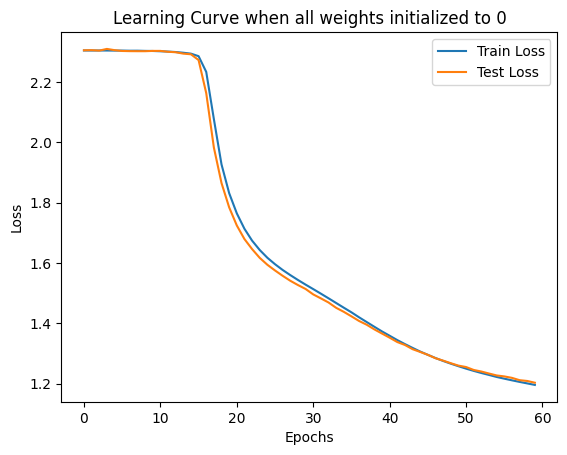

In [39]:
# Plot the train and test loss curve
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve when all weights initialized to 0')
plt.legend()
plt.savefig('q4_pytorch_weights0.png')
plt.show()

In [40]:
# Define a custom weight initialization function
def initialize_weights(layer):
  if isinstance(layer, nn.Linear):
    nn.init.uniform_(layer.weight, -1, 1)
    nn.init.zeros_(layer.bias)

model = NeuralNet(input_size, hidden_size, num_classes)
model.apply(initialize_weights)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0)

train_losses = []
test_losses = []
test_accuracies = []

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  model.train()
  running_loss = 0.0
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28)
    outputs = model(images)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    if (i+1) % 100 == 0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Step[{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

  train_loss = running_loss / len(train_loader)
  train_losses.append(train_loss)

  model.eval()
  with torch.no_grad():
    n_correct = 0
    n_samples = 0
    test_loss = 0.0
    for images, labels in test_loader:
      images = images.reshape(-1, 28*28)
      outputs = model(images)
      loss = criterion(outputs, labels)
      test_loss += loss.item()
      _, predicted = torch.max(outputs.data, 1) # max returns (value ,index)
      n_samples += labels.size(0)
      n_correct += (predicted == labels).sum().item()


    test_loss = test_loss / len(test_loader)
    test_losses.append(test_loss)

    test_accuracy = (100.0 * n_correct) / n_samples
    test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%, Test Error: {100-test_accuracy:.2f}%')

Epoch [1/60], Step[100/938], Loss: 5.0311
Epoch [1/60], Step[200/938], Loss: 2.2382
Epoch [1/60], Step[300/938], Loss: 2.8252
Epoch [1/60], Step[400/938], Loss: 2.0460
Epoch [1/60], Step[500/938], Loss: 1.7950
Epoch [1/60], Step[600/938], Loss: 1.8200
Epoch [1/60], Step[700/938], Loss: 1.2238
Epoch [1/60], Step[800/938], Loss: 1.3921
Epoch [1/60], Step[900/938], Loss: 1.7212
Epoch [1/60], Train Loss: 2.5277, Test Loss: 1.2513, Test Accuracy: 65.13%, Test Error: 34.87%
Epoch [2/60], Step[100/938], Loss: 0.8972
Epoch [2/60], Step[200/938], Loss: 1.2262
Epoch [2/60], Step[300/938], Loss: 0.7501
Epoch [2/60], Step[400/938], Loss: 1.0618
Epoch [2/60], Step[500/938], Loss: 0.9315
Epoch [2/60], Step[600/938], Loss: 1.0437
Epoch [2/60], Step[700/938], Loss: 0.8731
Epoch [2/60], Step[800/938], Loss: 0.8432
Epoch [2/60], Step[900/938], Loss: 1.2539
Epoch [2/60], Train Loss: 1.0648, Test Loss: 0.8389, Test Accuracy: 75.28%, Test Error: 24.72%
Epoch [3/60], Step[100/938], Loss: 0.9406
Epoch [3/60]

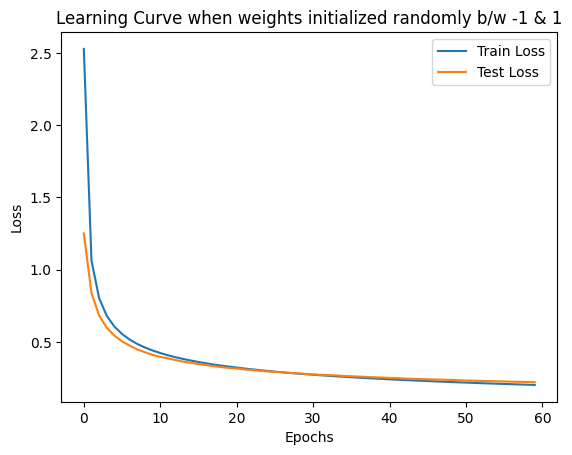

In [41]:
# Plot the train and test loss curve
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve when weights initialized randomly b/w -1 & 1')
plt.legend()
plt.savefig('q4_pytorch_weightsrandom.png')
plt.show()

In [5]:
from keras.utils import to_categorical

# Extract and reshape the data and labels
X_train = train_dataset.data.numpy().reshape(-1, 28 * 28)  # Reshape images to (num_samples, 28*28)
y_train = train_dataset.targets.numpy()

X_test = test_dataset.data.numpy().reshape(-1, 28 * 28)
y_test = test_dataset.targets.numpy()

# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Ensure labels are one-hot encoded or represented as integers (depends on your network implementation)
# For example, if your network expects integer labels:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [24]:
import numpy as np
import time
from sklearn.metrics import accuracy_score
from scipy.special import expit, softmax

class NeuralNetwork():
  def __init__(self, sizes, epochs, learning_rate):
    self.sizes = sizes
    self.epochs = epochs
    self.learning_rate = learning_rate

    self.params = self.initialization()


  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))


  def sigmoid_derivative(self, x):
    return np.multiply(expit(x), 1 - expit(x))


  def softmax(self, z):
    e_z = np.exp(z - np.max(z, axis=0)) # subtracting max(z) for numerical stability
    return e_z / (np.sum(e_z, axis=0) + 1e-10)


  '''
  Derivative of g_i with respect to z_j = g_i * (1{i = j} - g_j)
    if i = j, derivative = g_i * (1 - g_j)
    if i != j, derivative = g_i * -g_j
  '''
  def softmax_derivative(self, z):
    return np.multiply(softmax(z), 1 - softmax(z))



  def cross_entropy_loss(self, y_true, y_pred):
    # Use the log-sum-exp trick for numerical stability
    # log_sum_exp = np.log(np.sum(np.exp(y_pred), axis=0) + 1e-10)
    # return  - np.sum(y_true * (y_pred - log_sum_exp), axis=0)
    return - np.sum(y_true * np.log(y_pred))


  def initialization(self):
    input_layer  = self.sizes[0]
    hidden_layer = self.sizes[1]
    output_layer = self.sizes[2]

    params = {
        'W1':np.random.randn(hidden_layer, input_layer), #* np.sqrt(1. / hidden_layer)
        'W2':np.random.randn(output_layer, hidden_layer) #* np.sqrt(1. / output_layer)
    }
    return params


  def forward_pass(self, X_train):
    params = self.params

    params['A0'] = X_train

    params['Z1'] = np.matmul(params['W1'], params['A0'])
    params['A1'] = expit(params['Z1'])

    params['Z2'] = np.matmul(params['W2'], params['A1'])
    params['A2'] = softmax(params['Z2'])

    return params['A2']


  def backward_pass(self, y_train, output):
    params = self.params
    change_in_w = {}

    dL_dW2 = np.matmul((params['A2'] - y_train), params['A1'].T)

    dL_da  = np.matmul( params['W2'].T, (params['A2'] - y_train))
    da_dz1 = self.sigmoid_derivative(params['Z1'])
    dL_dW1 = np.matmul(dL_da * da_dz1, params['A0'].T)

    change_in_w['W2'] = dL_dW2
    change_in_w['W1'] = dL_dW1
    return change_in_w


  def update_network_parameters(self, change_in_w):
    for key, value in change_in_w.items():
      self.params[key] -= self.learning_rate * value


  def compute_accuracy(self, X_test, y_test):
    predictions = []
    test_loss = 0.0
    for x, y in zip(X_test, y_test):
      x = x[:, np.newaxis]
      y = y[:, np.newaxis]
      output = self.forward_pass(x)
      test_loss += self.cross_entropy_loss(y, output)
      pred = np.argmax(output)
      predictions.append(pred == np.argmax(y))

    return np.mean(predictions), test_loss


  def train(self, X_train, y_train, X_test, y_test):
    start_time = time.time()

    train_losses = []
    test_losses  = []

    for epoch in range(self.epochs):
      train_loss = 0.0
      for j, (x, y) in enumerate(zip(X_train, y_train)):
        x = x[:, np.newaxis] # (784,) -> (784, 1)
        y = y[:, np.newaxis] # (10,) -> (10, 1)
        output = self.forward_pass(x)
        train_loss += self.cross_entropy_loss(y, output)
        change_in_w = self.backward_pass(y, output)
        self.update_network_parameters(change_in_w)

      train_l = train_loss/len(X_train)
      train_losses.append(train_l)

      acc, test_loss = self.compute_accuracy(X_test, y_test)
      test_l = test_loss/len(X_test)
      test_losses.append(test_l)

      #print('Epoch: {0}/{1}, Time Spent: {2:.2f}s, Train Loss: {3:.4f}, Test Loss: {4:.4f}, Test Error: {5:.2f}%'.format(epoch+1, self.epochs, time.time() - start_time, train_loss.mean(), test_loss.mean(), 100-acc))
      print('Epoch: {0}/{1}, Time Spent: {2:.2f}s, Train loss: {3:.4f}, Test Loss: {4:.4f}, Test Accuracy: {5:.2f}%, Test Error: {6:.2f}%'.format(epoch+1, self.epochs, time.time() - start_time, train_l, test_l, acc*100, (100-acc*100)))
    return train_losses, test_losses


  def train_minibatch(self, X_train, y_train, X_test, y_test, batch_size):
    start_time = time.time()
    train_losses = []
    test_losses = []

    for epoch in range(self.epochs):
        train_loss = 0.0
        num_batches = len(X_train) // batch_size

        for batch in range(num_batches):
            batch_start = batch * batch_size
            batch_end = (batch + 1) * batch_size
            batch_X = X_train[batch_start:batch_end]
            batch_y = y_train[batch_start:batch_end]

            batch_loss = 0.0

            for j in range(len(batch_X)):
                x = batch_X[j][:, np.newaxis]
                y = batch_y[j][:, np.newaxis]
                output = self.forward_pass(x)
                batch_loss += self.cross_entropy_loss(y, output)
                change_in_w = self.backward_pass(y, output)
                self.update_network_parameters(change_in_w)

            batch_loss /= len(batch_X)
            train_loss += batch_loss

        train_loss /= num_batches
        train_losses.append(train_loss)

        acc, test_loss = self.compute_accuracy(X_test, y_test)
        test_losses.append(test_loss / num_batches)

        print('Epoch: {0}/{1}, Time Spent: {2:.2f}s, Train loss: {3:.4f}, Test Loss: {4:.4f}, Test Accuracy: {5:.2f}%, Test Error: {6:.2f}%'.format(epoch + 1, self.epochs, time.time() - start_time, train_loss, test_losses[-1], acc * 100, 100 - acc * 100))
    return train_losses, test_losses

  def compute_accuracy_minibatch(self, X_test, y_test, batch_size):
    predictions = []
    test_loss = 0.0

    for batch_start in range(0, len(X_test), batch_size):
      batch_end = min(batch_start + batch_size, len(X_test))
      batch_X = X_test[batch_start:batch_end]
      batch_y = y_test[batch_start:batch_end]
      batch_loss = 0.0

      for j in range(len(batch_X)):
        x = batch_X[j][:, np.newaxis]
        y = batch_y[j][:, np.newaxis]
        output = self.forward_pass(x)
        batch_loss += self.cross_entropy_loss(y, output)
        pred = np.argmax(output)
        predictions.append(pred == np.argmax(y))

      batch_loss = batch_loss / len(batch_X)
      test_loss += batch_loss

    return np.mean(predictions), test_loss


In [67]:
nn1 = NeuralNetwork(sizes=[784, 300, 10], epochs=10, learning_rate=0.01)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
train_losses, test_losses = nn1.train(X_train.T, y_train.T, X_test.T, y_test.T)

(784, 60000)
(10, 60000)
(784, 10000)
(10, 10000)
Epoch: 1/10, Time Spent: 144.41s, Train loss: 0.7924, Test Loss: 0.4797, Test Accuracy: 89.79%, Test Error: 10.21%
Epoch: 2/10, Time Spent: 292.84s, Train loss: 0.3206, Test Loss: 0.3613, Test Accuracy: 91.42%, Test Error: 8.58%
Epoch: 3/10, Time Spent: 437.85s, Train loss: 0.2250, Test Loss: 0.3169, Test Accuracy: 92.18%, Test Error: 7.82%
Epoch: 4/10, Time Spent: 582.12s, Train loss: 0.1745, Test Loss: 0.2891, Test Accuracy: 92.78%, Test Error: 7.22%
Epoch: 5/10, Time Spent: 728.33s, Train loss: 0.1422, Test Loss: 0.2692, Test Accuracy: 93.14%, Test Error: 6.86%
Epoch: 6/10, Time Spent: 875.81s, Train loss: 0.1193, Test Loss: 0.2544, Test Accuracy: 93.50%, Test Error: 6.50%
Epoch: 7/10, Time Spent: 1019.24s, Train loss: 0.1018, Test Loss: 0.2431, Test Accuracy: 93.77%, Test Error: 6.23%
Epoch: 8/10, Time Spent: 1166.45s, Train loss: 0.0877, Test Loss: 0.2350, Test Accuracy: 93.90%, Test Error: 6.10%
Epoch: 9/10, Time Spent: 1314.52s, 

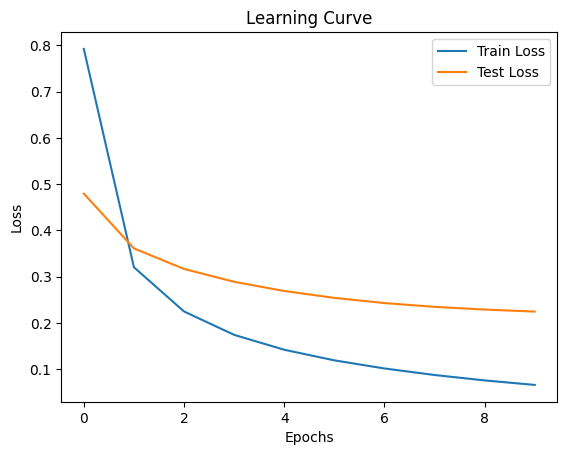

In [73]:
# Plot the train and test loss curve
num_epochs = 10
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.savefig('q4_self.png')
plt.show()

In [25]:
nn1 = NeuralNetwork(sizes=[784, 300, 10], epochs=10, learning_rate=0.01)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
train_losses, test_losses = nn1.train_minibatch(X_train, y_train, X_test, y_test, 64)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)
Epoch: 1/10, Time Spent: 138.96s, Train loss: 0.7776, Test Loss: 4.4794, Test Accuracy: 90.24%, Test Error: 9.76%
Epoch: 2/10, Time Spent: 272.06s, Train loss: 0.3128, Test Loss: 3.4130, Test Accuracy: 92.14%, Test Error: 7.86%
Epoch: 3/10, Time Spent: 405.12s, Train loss: 0.2181, Test Loss: 2.9744, Test Accuracy: 92.89%, Test Error: 7.11%
Epoch: 4/10, Time Spent: 539.56s, Train loss: 0.1689, Test Loss: 2.7380, Test Accuracy: 93.28%, Test Error: 6.72%
Epoch: 5/10, Time Spent: 672.19s, Train loss: 0.1374, Test Loss: 2.5905, Test Accuracy: 93.64%, Test Error: 6.36%
Epoch: 6/10, Time Spent: 804.98s, Train loss: 0.1150, Test Loss: 2.4998, Test Accuracy: 93.85%, Test Error: 6.15%
Epoch: 7/10, Time Spent: 937.72s, Train loss: 0.0979, Test Loss: 2.4373, Test Accuracy: 94.01%, Test Error: 5.99%
Epoch: 8/10, Time Spent: 1075.92s, Train loss: 0.0843, Test Loss: 2.3829, Test Accuracy: 94.18%, Test Error: 5.82%
Epoch: 9/10, Time Spent: 1209.37s, Tr

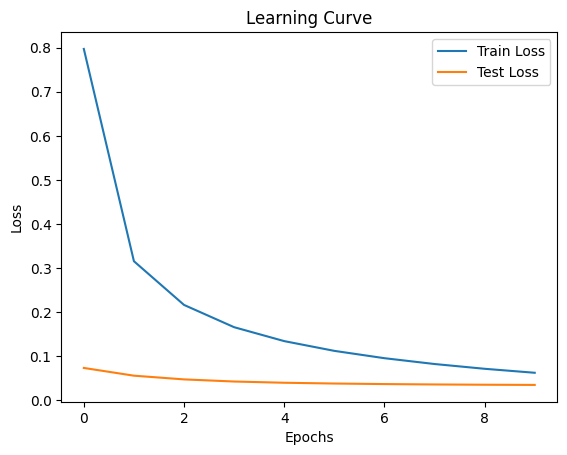

In [23]:
# Plot the train and test loss curve
num_epochs = 10
plt.plot(range(num_epochs), train_losses, label='Train Loss')
plt.plot(range(num_epochs), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.savefig('q4_self2.png')
plt.show()